In [6]:
### import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize



In [7]:
df = pd.read_csv('tw_gen.csv',encoding = 'latin1')
print(df.columns.values , '\n',df.shape, '\n')
df.drop(columns = ['_unit_id',
                      '_last_judgment_at',
                      'user_timezone',
                      'tweet_coord',
                      'tweet_count',
                      'tweet_created', 
                      'tweet_id',
                      'tweet_location',
                      'profileimage',
                      'created'],inplace = True)
df.info()

['_unit_id' '_golden' '_unit_state' '_trusted_judgments'
 '_last_judgment_at' 'gender' 'gender:confidence' 'profile_yn'
 'profile_yn:confidence' 'created' 'description' 'fav_number'
 'gender_gold' 'link_color' 'name' 'profile_yn_gold' 'profileimage'
 'retweet_count' 'sidebar_color' 'text' 'tweet_coord' 'tweet_count'
 'tweet_created' 'tweet_id' 'tweet_location' 'user_timezone'] 
 (20050, 26) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20050 entries, 0 to 20049
Data columns (total 16 columns):
_golden                  20050 non-null bool
_unit_state              20050 non-null object
_trusted_judgments       20050 non-null int64
gender                   19953 non-null object
gender:confidence        20024 non-null float64
profile_yn               20050 non-null object
profile_yn:confidence    20050 non-null float64
description              16306 non-null object
fav_number               20050 non-null int64
gender_gold              50 non-null object
link_color               20050

In [8]:
df.head(5)

,_golden,_unit_state,_trusted_judgments,gender,gender:confidence,profile_yn,profile_yn:confidence,description,fav_number,gender_gold,link_color,name,profile_yn_gold,retweet_count,sidebar_color,text
0,False,finalized,3,male,1.0000,yes,1.0,i sing my own rhythm.,0,NaN,08C2C2,sheezy0,NaN,0,FFFFFF,Robbie E Responds To Critics After Win Against...
1,False,finalized,3,male,1.0000,yes,1.0,I'm the author of novels filled with family dr...,68,NaN,0084B4,DavdBurnett,NaN,0,C0DEED,ÛÏIt felt like they were my friends and I was...
2,False,finalized,3,male,0.6625,yes,1.0,louis whining and squealing and all,7696,NaN,ABB8C2,lwtprettylaugh,NaN,1,C0DEED,i absolutely adore when louis starts the songs...
3,False,finalized,3,male,1.0000,yes,1.0,"Mobile guy. 49ers, Shazam, Google, Kleiner Pe...",202,NaN,0084B4,douggarland,NaN,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...
4,False,finalized,3,female,1.0000,yes,1.0,Ricky Wilson The Best FRONTMAN/Kaiser Chiefs T...,37318,NaN,3B94D9,WilfordGemma,NaN,0,0,Watching Neighbours on Sky+ catching up with t...


In [9]:
### cleaning data set
df['gender'].value_counts()

female     6700
male       6194
brand      5942
unknown    1117
Name: gender, dtype: int64

In [10]:
drop_index = df[df['gender']=='unknown'].index
df.drop(drop_index,inplace = True)

df['gender'].value_counts()

female    6700
male      6194
brand     5942
Name: gender, dtype: int64

In [11]:
drop_index = df[df['gender']=='brand'].index
df.drop(drop_index,inplace = True)

df['gender'].value_counts()

female    6700
male      6194
Name: gender, dtype: int64

In [12]:
### profile information
print(df['profile_yn'].value_counts())
df[df['profile_yn']=='no']['gender']

yes    12894
no        97
Name: profile_yn, dtype: int64


109      NaN
137      NaN
496      NaN
582      NaN
679      NaN
749      NaN
1179     NaN
1664     NaN
1698     NaN
1963     NaN
2118     NaN
2245     NaN
2272     NaN
2377     NaN
2537     NaN
2596     NaN
2717     NaN
2751     NaN
2765     NaN
2886     NaN
2980     NaN
3190     NaN
3195     NaN
3219     NaN
3337     NaN
3381     NaN
3553     NaN
3791     NaN
3942     NaN
4008     NaN
        ... 
12103    NaN
12889    NaN
13007    NaN
14045    NaN
15018    NaN
15243    NaN
15270    NaN
15428    NaN
15450    NaN
15740    NaN
15921    NaN
16208    NaN
16365    NaN
16640    NaN
16886    NaN
16991    NaN
17114    NaN
17163    NaN
18001    NaN
18048    NaN
18063    NaN
18070    NaN
18122    NaN
18136    NaN
18303    NaN
18524    NaN
18700    NaN
18840    NaN
19773    NaN
19842    NaN
Name: gender, Length: 97, dtype: object

In [13]:
drop_index = df[df['profile_yn']=='no'].index
df.drop(drop_index,inplace = True)
print(df['profile_yn'].value_counts())
df.drop(columns = ['profile_yn','profile_yn:confidence','profile_yn_gold'],inplace = True)

yes    12894
Name: profile_yn, dtype: int64


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12894 entries, 0 to 20049
Data columns (total 13 columns):
_golden               12894 non-null bool
_unit_state           12894 non-null object
_trusted_judgments    12894 non-null int64
gender                12894 non-null object
gender:confidence     12894 non-null float64
description           11194 non-null object
fav_number            12894 non-null int64
gender_gold           36 non-null object
link_color            12894 non-null object
name                  12894 non-null object
retweet_count         12894 non-null int64
sidebar_color         12894 non-null object
text                  12894 non-null object
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 1.3+ MB


In [15]:
## keep only 100% confidence
print('complete data', df.shape)
print('data with < 100% confidence', df[df['gender:confidence']<1].shape)
drop_index = df[df['gender:confidence']<1].index
df.drop(drop_index , inplace = True)
print(df['gender:confidence'].value_counts())
df.drop(columns = ['gender:confidence'],inplace = True)


complete data (12894, 13)
data with < 100% confidence (2874, 13)
1.0    10020
Name: gender:confidence, dtype: int64


In [16]:
### remove features that dont have an impact
df.drop(columns = ['_golden','_unit_state','_trusted_judgments','gender_gold'], inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10020 entries, 0 to 20049
Data columns (total 8 columns):
gender           10020 non-null object
description      8766 non-null object
fav_number       10020 non-null int64
link_color       10020 non-null object
name             10020 non-null object
retweet_count    10020 non-null int64
sidebar_color    10020 non-null object
text             10020 non-null object
dtypes: int64(2), object(6)
memory usage: 704.5+ KB


In [17]:
### removing stop_words from text data
from collections import Counter

tweets_vocab = Counter()
for tweet in df['text']:
    for word in tweet.split(' '):
        tweets_vocab[word]+=1
        
tweets_vocab.most_common(10)

[('the', 6563),
 ('and', 6165),
 ('to', 3277),
 ('I', 3072),
 ('a', 2482),
 ('of', 1983),
 ('you', 1865),
 ('in', 1735),
 ('for', 1569),
 ('is', 1481)]

In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suniljoshi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets_vocab_removed = Counter()

for i , j in tweets_vocab.items():
    if not i in stop:
      tweets_vocab_removed[i] = j
tweets_vocab_removed.most_common(50)


[('I', 3072),
 ('The', 879),
 ('', 805),
 ("I'm", 627),
 ('like', 571),
 ('get', 495),
 ('-', 397),
 ('And', 380),
 ('one', 357),
 ('love', 300),
 ('people', 282),
 ('time', 270),
 ('go', 268),
 ('got', 257),
 ('know', 254),
 ('new', 248),
 ('&amp;', 224),
 ('best', 222),
 ('day', 221),
 ('want', 217),
 ('good', 213),
 ('still', 212),
 ('think', 208),
 ('back', 207),
 ('need', 202),
 ('see', 201),
 ('make', 191),
 ('You', 187),
 ('would', 172),
 ("can't", 167),
 ('going', 166),
 ('really', 165),
 ('2', 163),
 ('If', 162),
 ('My', 159),
 ('Just', 155),
 ('u', 154),
 ('When', 153),
 ('even', 152),
 ("I've", 152),
 ('A', 147),
 ('last', 147),
 ('THE', 143),
 ('via', 142),
 ('way', 141),
 ("It's", 140),
 ('work', 139),
 ('AND', 137),
 ('never', 137),
 ('This', 134)]

In [20]:
### remove special characters 
import re
def process(text):
    text = re.sub('<[^>]*>', '', text) ##remove html tags
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text) ### remove emoticons 
    text = (re.sub('[\W]+', ' ', text.lower()) + ' '+' '.join(emoticons).replace('_', ''))
    return text

print(process('This is !! @ social computing class :) wow <b>nice</b>'))

this is social computing class wow nice :)


In [21]:
### lemmatization
from nltk.stem import PorterStemmer
porter = PorterStemmer()
def tokenizer(text):
    return text.split()
def tokenize_porter(text):
    return [porter.stem(word) for word in text.split()]

print(tokenizer('twitter gender calssifier'))
print(tokenize_porter('twitter gender calssifier'))

['twitter', 'gender', 'calssifier']
['twitter', 'gender', 'calssifi']


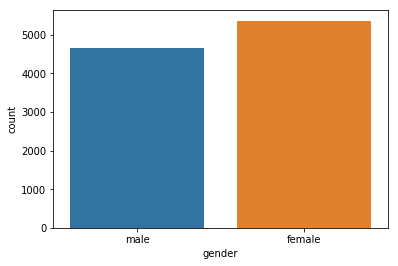

In [22]:
## visulaize gender lables 
sns.countplot(df['gender'], label = 'Gender')


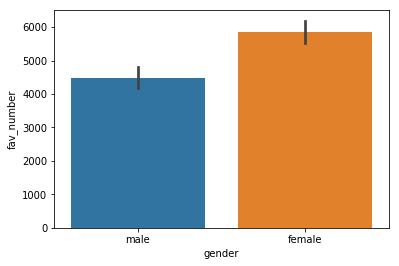

In [23]:
### favourite and retweets bar plot
sns.barplot(x = 'gender' , y = 'fav_number', data = df)

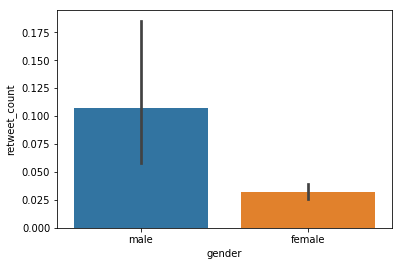

In [24]:
sns.barplot(x = 'gender' , y = 'retweet_count', data = df)

['C0DEED' 'FFFFFF' '000000' 'EEEEEE' '181A1E' 'A8C7F7' '5ED4DC' 'BDDCAD'
 '65B0DA' '86A4A6']


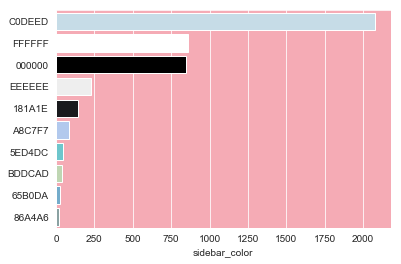

In [25]:
### male profile color attributes

male_top_sidebar_color = df[df['gender']=='male']['sidebar_color'].value_counts().head(10)
male_top_sidebar_index = male_top_sidebar_color.index
male_top_color = male_top_sidebar_index.values

male_top_color[2]= '000000'
print(male_top_color)

hex_code = lambda x :'#'+x
sns.set_style('darkgrid', {'axes.facecolor':'#F5ABB5'})
sns.barplot(x = male_top_sidebar_color, y = male_top_color, palette = list(map(hex_code, male_top_color)))

['C0DEED' '000000' '0' 'EEEEEE' '65B0DA' '5ED4DC' 'CC3366' '181A1E'
 '829D5E' 'DBE9ED']


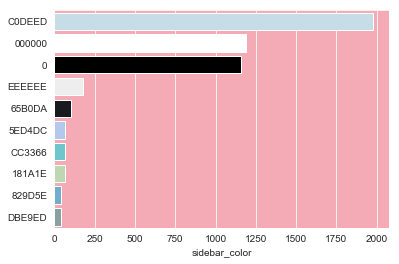

In [26]:
### female profile color attributes

female_top_sidebar_color = df[df['gender']=='female']['sidebar_color'].value_counts().head(10)
female_top_sidebar_index = female_top_sidebar_color.index
female_top_color = female_top_sidebar_index.values

female_top_color[1:2]= '000000'
print(female_top_color)

hex_code = lambda x :'#'+x
sns.set_style('darkgrid', {'axes.facecolor':'#F5ABB5'})
sns.barplot(x = female_top_sidebar_color, y = female_top_color, palette = list(map(hex_code, male_top_color)))

In [27]:
### from above side_bar_clor amalysis it is not giving useful information for calssifying gender ,
###as top3 colors of both male and female are same which could be theme color on twitter profile page



['0084B4' '009999' '000000' '2FC2EF' 'DD2E44' '009998' 'ABB8C2' '4A913C'
 '0099B9' 'FF0000']


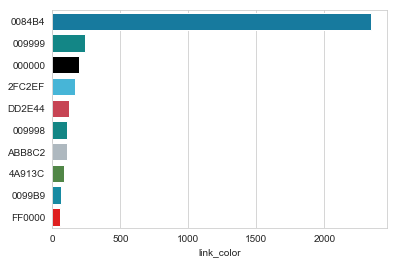

In [28]:
## male  link color attributes

male_top_link_color = df[df['gender']=='male']['link_color'].value_counts().head(10)
male_top_link_index = male_top_link_color.index
male_top_color = male_top_link_index.values

male_top_color[2]= '000000'
male_top_color[1] = '009999'
male_top_color[5] = '009998'
print(male_top_color)

hex_code = lambda x :'#'+x
sns.set_style('whitegrid', {'axes.facecolor':'white'})
sns.barplot(x = male_top_link_color, y = male_top_color, palette = list(map(hex_code, male_top_color)))

['C0DEED' '009999' '000000' 'EEEEEE' '65B0DA' '5ED4DC' '009998' '181A1E'
 '829D5E' 'DBE9ED']


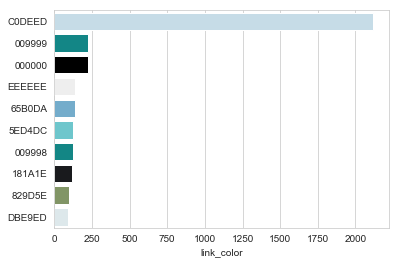

In [29]:
## female  link color attributes

female_top_link_color = df[df['gender']=='female']['link_color'].value_counts().head(10)
female_top_link_index = female_top_link_color.index
male_top_color = female_top_link_index.values

female_top_color[2]= '000000'
female_top_color[1] = '009999'
female_top_color[6] = '009998'
print(female_top_color)

hex_code = lambda x :'#'+x
sns.set_style('whitegrid', {'axes.facecolor':'white'})
sns.barplot(x = female_top_link_color, y = female_top_color, palette = list(map(hex_code, female_top_color)))

In [30]:
### training model only with text features as color doesnt give any useful information

### using TFIDF method
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['gender'])

## split data into test and train data
x = df['text']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 0, stratify = y)



x_train.head()

9377     Gained 11 new followers in the past day. IÛªm...
18292    @arch_369 I wanna get it started and finished ...
9813     I'm gonna fight the dog next door if it doesn'...
15029    Boys playing golf on xbox which means I get to...
17690    @Number10gov regarding tax credits and the hou...
Name: text, dtype: object

In [272]:
### logistic regression model

from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase = False, tokenizer = tokenize_porter, preprocessor = process)

clf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(multi_class = 'ovr', random_state = 0))])

clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

print('Logistic Regression Accuracy :', accuracy_score(y_test , prediction))
logistic_confusion_matrix = confusion_matrix(y_test , prediction)
print('Confusuon Matrix : \n', logistic_confusion_matrix)
print('Claafier Report : \n' ,classification_report(y_test , prediction) )

test_predictions = clf.predict(x_test)
print (test_predictions[:20])


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Accuracy : 0.6190951430472389
Confusuon Matrix : 
 [[1129  481]
 [ 664  732]]
Claafier Report : 
               precision    recall  f1-score   support

           0       0.63      0.70      0.66      1610
           1       0.60      0.52      0.56      1396

   micro avg       0.62      0.62      0.62      3006
   macro avg       0.62      0.61      0.61      3006
weighted avg       0.62      0.62      0.62      3006

[0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0]


In [60]:
# y_test = y_test.reshape(0,len(y_test))
# y_test = label_binarize(y_test,classes = [0,1,2, 3])


# print('AUC : \n' , roc_auc_score(y_test, prediction) )


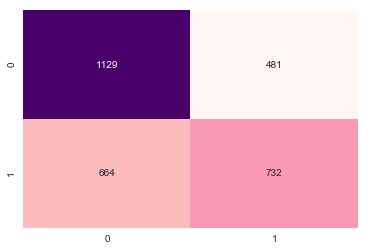

In [273]:
import seaborn as sns

sns.heatmap(logistic_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

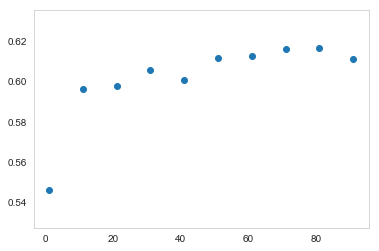

In [274]:
### Random forest model

from sklearn.ensemble import RandomForestClassifier


results = []
n = range(1,100,10)
for i in n:
    clf = Pipeline([('vect',tfidf), ('clf', RandomForestClassifier(n_estimators = i, random_state = 0))])
    clf.fit(x_train, y_train)
    prediction = clf.predict(x_test)
    results.append(accuracy_score(y_test, prediction))
plt.grid()
plt.scatter(n, results)
    


In [275]:
tfidf = TfidfVectorizer(lowercase =False , tokenizer = tokenize_porter, preprocessor = process)
clf = Pipeline([('vect',tfidf), ('clf', RandomForestClassifier(n_estimators = 80, random_state = 0))])
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print('Accuracy :', accuracy_score(y_test , prediction))
random_confusion_matrix = confusion_matrix(y_test , prediction)

print('Confusuon Matrix : \n', random_confusion_matrix)
print('Claafier Report : \n' ,classification_report(y_test , prediction) )

Accuracy : 0.6111111111111112
Confusuon Matrix : 
 [[1220  390]
 [ 779  617]]
Claafier Report : 
               precision    recall  f1-score   support

           0       0.61      0.76      0.68      1610
           1       0.61      0.44      0.51      1396

   micro avg       0.61      0.61      0.61      3006
   macro avg       0.61      0.60      0.59      3006
weighted avg       0.61      0.61      0.60      3006



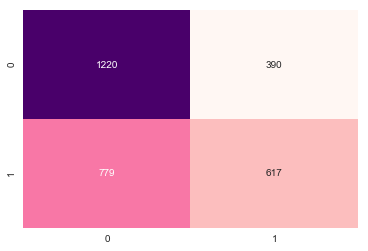

In [276]:
import seaborn as sns

sns.heatmap(random_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [277]:
####  support vector machines model
from sklearn.svm import SVC

tfidf = TfidfVectorizer(lowercase =False , tokenizer = tokenize_porter, preprocessor = process)
clf = Pipeline([('vect',tfidf), ('clf', SVC(kernel = 'linear'))])
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)

print('Accuracy :', accuracy_score(y_test , prediction))
svm_confusion_matrix = confusion_matrix(y_test , prediction)

print('Confusuon Matrix : \n', svm_confusion_matrix)
print('Claafier Report : \n' ,classification_report(y_test , prediction) )

Accuracy : 0.6111111111111112
Confusuon Matrix : 
 [[1220  390]
 [ 779  617]]
Claafier Report : 
               precision    recall  f1-score   support

           0       0.61      0.76      0.68      1610
           1       0.61      0.44      0.51      1396

   micro avg       0.61      0.61      0.61      3006
   macro avg       0.61      0.60      0.59      3006
weighted avg       0.61      0.61      0.60      3006



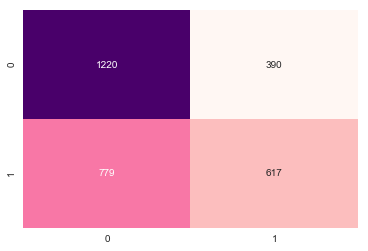

In [278]:
import seaborn as sns

sns.heatmap(svm_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [ ]:
### we can also conact descritption with text and build same models as done with text data


In [281]:
### ensembkle Voting classifier for all three models
from sklearn.ensemble import VotingClassifier
clf1 = LogisticRegression(multi_class='ovr', random_state=0)
clf2 = RandomForestClassifier(n_estimators = 80, random_state=0)
clf3 = SVC(kernel = 'linear',probability = True, random_state=0)

ensemble_clf = VotingClassifier(estimators=[
        ('lr', clf1), ('rf', clf2), ('svm', clf3)], voting='soft')

clf = Pipeline([('vect', tfidf),
                ('clf', ensemble_clf)])

clf.fit(x_train, y_train)


predictions = clf.predict(x_test)
print('Accuracy:',accuracy_score(y_test,prediction))
ensemble_confusion_matrix = confusion_matrix(y_test,prediction)
print('Confusion matrix:\n',ensemble_confusion_matrix)
print('Classification report:\n',classification_report(y_test,prediction))

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.6111111111111112
Confusion matrix:
 [[1220  390]
 [ 779  617]]
Classification report:
               precision    recall  f1-score   support

           0       0.61      0.76      0.68      1610
           1       0.61      0.44      0.51      1396

   micro avg       0.61      0.61      0.61      3006
   macro avg       0.61      0.60      0.59      3006
weighted avg       0.61      0.61      0.60      3006



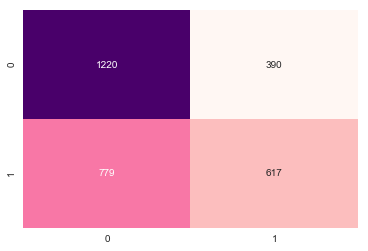

In [282]:
import seaborn as sns

sns.heatmap(ensemble_confusion_matrix,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()

In [ ]:
### as we can see there is not so much difference with the ensembles voting classifier as well , but in general 
### ensemble voting classfier gives good results

In [153]:
#### part 6 predicting from results hw-1 

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
from nltk import pos_tag, ne_chunk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer 


stemmer = PorterStemmer()
lem = WordNetLemmatizer()

### read the data set
with open('Mar10_GroupA.txt','r') as f:
    data = f.readlines()
    #print(data)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suniljoshi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/suniljoshi/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /Users/suniljoshi/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/suniljoshi/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [225]:
l = []
k = []
for word in data:
    token_words = word_tokenize(word)
    names = token_words[0]
    text = ' '.join(token_words[6:])
    l.append(names)
    k.append(text)
print(l[0])
print(k[0])


moderator
made it huh : - ) .


In [226]:
#### male female names list
males ='moderator luke ted david matthew jake rick josh tony aaron michael nick george john '
male_name = males.split()
print(male_name)
females = 'judith tia meg vicky eva julie rita leah caroline cintihia ariel macy lynn rebecca cinthia mara amy michelle'
female_names = females.split()
print(female_names)




['moderator', 'luke', 'ted', 'david', 'matthew', 'jake', 'rick', 'josh', 'tony', 'aaron', 'michael', 'nick', 'george', 'john']
['judith', 'tia', 'meg', 'vicky', 'eva', 'julie', 'rita', 'leah', 'caroline', 'cintihia', 'ariel', 'macy', 'lynn', 'rebecca', 'cinthia', 'mara', 'amy', 'michelle']


In [215]:
for x in l:
    print(x)

moderator
cinthia
cinthia
moderator
cinthia
moderator
moderator
ted
tia
leah
ariel
moderator
ariel
moderator
tia
ted
moderator
cinthia
moderator
moderator
ted
tia
ariel
cinthia
tia
ted
ariel
ariel
tia
cinthia
cinthia
ted
cinthia
tia
cinthia
ariel
ted
ted
tia
tia
ariel
cinthia
cinthia
cinthia
leah
ariel
ted
leah
ariel
ariel
ariel
tia
ted
ariel
tia
leah
tia
ariel
ariel
tia
cinthia
ariel
tia
cinthia
tia
ariel
ariel
tia
ted
leah
tia
ted
ariel
ariel
tia
leah
ted
ariel
ted
ted
leah
cinthia
cinthia
ted
tia
ted
ted
ariel
ted
tia
leah
cinthia
cinthia
ariel
ariel
ted
tia
tia
tia
leah
ted
cinthia
cinthia
ariel
ariel
ted
leah
ted
cinthia
tia
ariel
cinthia
leah
ted
tia
tia
ted
leah
ted
leah
ted
cinthia
cinthia
tia
cinthia
cinthia
tia
ted
ted
ted
ariel
tia
tia
tia
cinthia
tia
tia
tia
ted
leah
tia
ted
tia
ted
tia
ted
cinthia
ariel
tia
tia
ariel
leah
tia
ted
ariel
leah
leah
ariel
ariel
ted
leah
ariel
ted
leah
ariel
ariel
tia
ariel
ariel
cinthia
cinthia
ted
ariel
ariel
cinthia
leah
cinthia
ted
ariel
le

In [227]:
import pandas as pd

#df = pd.DataFrame({'names':l, 'text':k , 'gender': ''})

t = []
for i in l:
    for j in male_name:
        if i==j:
            t.append('male')
    for m in female_names:
        if i == m :
            t.append('female')
for v in t:
    print(v)

male
female
female
male
female
male
male
male
female
female
female
male
female
male
female
male
male
female
male
male
male
female
female
female
female
male
female
female
female
female
female
male
female
female
female
female
male
male
female
female
female
female
female
female
female
female
male
female
female
female
female
female
male
female
female
female
female
female
female
female
female
female
female
female
female
female
female
female
male
female
female
male
female
female
female
female
male
female
male
male
female
female
female
male
female
male
male
female
male
female
female
female
female
female
female
male
female
female
female
female
male
female
female
female
female
male
female
male
female
female
female
female
female
male
female
female
male
female
male
female
male
female
female
female
female
female
female
male
male
male
female
female
female
female
female
female
female
female
male
female
female
male
female
male
female
male
female
female
female
female
female
female
female
male
female
f

In [283]:
import pandas as pd

df = pd.DataFrame({'names':l, 'gender':t , 'text': k})
df
#print(df.head(20))
#print(df.shape)

,names,gender,text
0,moderator,male,made it huh : - ) .
1,cinthia,female,yep !
2,cinthia,female,fortunately i found a ride !
3,moderator,male,nice !
4,cinthia,female,are there more people coming ?
5,moderator,male,"Yes , there 's supposed to be 5 people in grou..."
6,moderator,male,hang on a sec ...
7,ted,male,i am in .
8,tia,female,Hi everyone .
9,leah,female,hello .


In [285]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

y = encoder.fit_transform(df['gender'])

## split data into test and train data
x = df['text']

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.3, random_state = 0, stratify = y)


x_train.head()


262    Is it always cool/cold there , or are there fo...
591    i hope you guys get to go to athens sometime s...
385                                    for the fun ! ! !
527                                              Paris .
239                                          of course .
Name: text, dtype: object

In [288]:
### logistic regression model

from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(lowercase = False, tokenizer = tokenize_porter, preprocessor = process)

clf = Pipeline([('vect', tfidf), ('clf', LogisticRegression(multi_class = 'ovr', random_state = 0))])

clf.fit(x_train, y_train)

prediction = clf.predict(x_test)

print('Logistic Regression Accuracy :', accuracy_score(y_test , prediction))
logistic_confusion_mat = confusion_matrix(y_test , prediction)
print('Confusuon Matrix : \n', logistic_confusion_mat)
print('Classifier Report : \n' ,classification_report(y_test , prediction) )

test_predictions = clf.predict(x_test)
print (test_predictions[:10])

Logistic Regression Accuracy : 0.8142857142857143
Confusuon Matrix : 
 [[170   0]
 [ 39   1]]
Classifier Report : 
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       170
           1       1.00      0.03      0.05        40

   micro avg       0.81      0.81      0.81       210
   macro avg       0.91      0.51      0.47       210
weighted avg       0.85      0.81      0.74       210

[0 0 0 0 0 0 0 0 0 0]


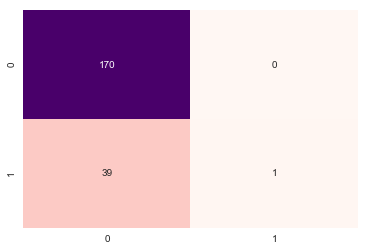

In [240]:
import seaborn as sns

sns.heatmap(logistic_confusion_mat,annot=True,cmap="RdPu",fmt=".0f",cbar=False)
plt.show()